In [41]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Traemos la base y la convertimos en dataFrame
Base_de_Datos= pd.read_excel('GPA_Y_CRECIMIENTO.xlsx')
Datos=pd.DataFrame(Base_de_Datos)

In [37]:
Datos.head(6) #sólo para ver la estructura de datosDatos_sin_Mexico

,Pais,Estatus,Gasto_Publico,Tasa_Crecimiento
0,ARGENTINA_DA,BIEN,3.571429,2.0625
1,ARGENTINA_IR,BIEN,3.800000,2.1000
2,ARGENTINA_JO,BIEN,3.571429,2.0625
3,ARGENTINA_PI,BIEN,3.690000,2.1600
4,BOLIVIA_DA,BIEN,5.357143,1.8125
5,BOLIVIA_IR,BIEN,5.800000,1.8000


In [94]:
summary = Datos.describe()
summary = summary.transpose()
print(summary)

                  count      mean       std      min    25%     50%    75%  \
Gasto_Publico      69.0  7.441296  5.498299  0.47000  3.800  5.7000  10.95   
Tasa_Crecimiento   69.0  2.692839  1.511246  0.47619  1.375  2.4375   3.56   

                   max  
Gasto_Publico     23.0  
Tasa_Crecimiento   5.8  


In [21]:
#Datos.sort_values(by=['Estatus'],ascending=[False]) #ordenamos por estatus
Datos.sort_values(by=['Estatus'],ascending=[False]).head(7) #ordenamos por estatus imprimimos los 7 primeros


,Pais,Estatus,Gasto_Publico,Tasa_Crecimiento
39,MEXICO_DA,MAL,22.976190,1.8125
40,MEXICO_IR,MAL,23.000000,1.9000
41,MEXICO_JO,MAL,22.976190,1.8125
42,MEXICO_PI,MAL,22.970000,1.9000
0,ARGENTINA_DA,BIEN,3.571429,2.0625
46,NICARAGUA_PI,BIEN,10.950000,4.1300
50,PANAMA_JO,BIEN,14.285714,5.3125


In [22]:
Datos_sin_Mexico = Datos.drop(Datos[Datos['Estatus']=='MAL'].index)

In [91]:
Datos_sin_Mexico.shape

(65, 4)

In [14]:
#Datos['Estatus'] #podemos traer así la variable
#Datos.Estatus #también la podemos traer así
#Datos.Estatus.head(6) #traer solo un cierto número


In [24]:
#imprimir el mínimo y máximo de las variables

print(min(Datos_sin_Mexico.Gasto_Publico), max(Datos_sin_Mexico.Gasto_Publico))
print(min(Datos_sin_Mexico.Tasa_Crecimiento), max(Datos_sin_Mexico.Tasa_Crecimiento))

0.47 14.2857142857
0.47619047619 5.8


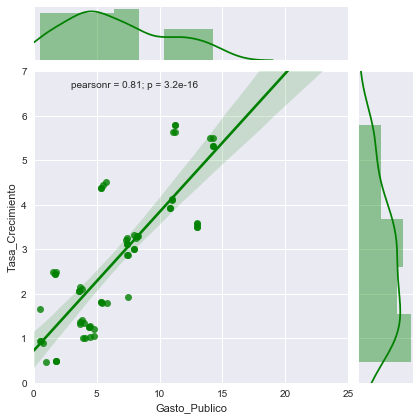

In [26]:
sns.set(style="darkgrid")

g = sns.jointplot("Gasto_Publico", "Tasa_Crecimiento", data=Datos_sin_Mexico,kind="reg",
                  xlim=(0, 25), ylim=(0, 7), color="g")

##AGREGAR UN TITULO

In [27]:
#importar libreria para la regresion
from sklearn.linear_model import LinearRegression

In [31]:
x=np.array(Datos_sin_Mexico.Gasto_Publico).reshape((-1,1))
y=np.array(Datos_sin_Mexico.Tasa_Crecimiento)

In [88]:
ds_x=np.std(Datos_sin_Mexico.Gasto_Publico) #desviancion estandar de X poblacional
ds_y=np.std(Datos_sin_Mexico.Tasa_Crecimiento) #desviancion estandar de y
Pxy=np.corrcoef(Datos_sin_Mexico.Gasto_Publico, Datos_sin_Mexico.Tasa_Crecimiento) #correlacion 
media=np.median(Datos_sin_Mexico.Tasa_Crecimiento)
ds_x2=np.std(Datos_sin_Mexico.Gasto_Publico, ddof=1) #desviación estandar de una muestra
#https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/
covarianza=np.cov(Datos_sin_Mexico.Gasto_Publico, Datos_sin_Mexico.Tasa_Crecimiento)

In [89]:
covarianza

array([[ 16.10014863,   5.01201208],
       [  5.01201208,   2.38005251]])

In [75]:
edades = [22, 23, 26, 26, 26, 34, 34, 38, 40, 41]
promedio_edad=np.median(edades)
print(promedio_edad)

30.0


In [68]:
0.3844840491753427*0.80909662

0.31108474463168356

In [35]:
#entrenamos el modelo
model2=LinearRegression()
model2.fit(x,y)
R_sq2=model2.score(x,y)

In [36]:
print("coeficiente de determinación",R_sq2)
print("intercepto b0",model2.intercept_)
print("pendiente b1",model2.coef_)

coeficiente de determinación 0.655552976036
intercepto b0 0.725516261512
pendiente b1 [ 0.31130222]


In [2]:
y_pred=model2.predict(x)

NameError: name 'model2' is not defined

In [43]:
#error cuadrático medio
from sklearn.metrics import mean_squared_error
from math import sqrt

rms2 = sqrt(mean_squared_error(y,y_pred))
print("Error Cuadrático Medio", rms2)

Error Cuadrático Medio 0.8984373473393845


In [47]:
print("valores predichos",y_pred)
print("valores reales",y)

valor_predich=y_pred
valor_real=y

valores predichos [ 1.83730992  1.90846471  1.83730992  1.87422147  2.39320675  2.53106916
  2.39320675  2.40654827  4.77244518  4.77244518  4.76503322  4.76503322
  2.9980225   3.02322316  3.02322316  3.02292668  0.9108152   0.94342782
  1.0173621   0.87182831  3.06028294  3.21593406  3.02322316  3.20659499
  3.2085221   3.30932472  3.24558189  3.2781945   1.28586027  1.27963422
  1.2443533   1.28586027  1.2443533   1.1924696   1.98554907  2.21976694
  1.94848929  2.12637627  3.06028294  4.09795703  4.14984073  4.09795703
  4.13427562  5.17091203  5.1726909   5.0837474   5.1726909   2.09672844
  2.20420183  2.09672844  2.12637627  2.39320675  2.49993894  2.39320675
  2.42833943  4.20913639  4.21210117  4.1720766   4.20898815  1.2628832
  0.88116737  1.87436971  1.97072516  1.87436971  1.90846471]
valores reales [ 2.0625      2.1         2.0625      2.16        1.8125      1.8         1.8125
  1.8         3.6         3.56        3.5         3.5         3.2         3.125
  3.125       3

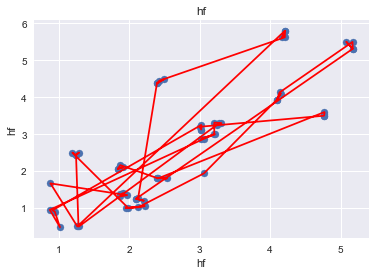

In [83]:
plt.scatter(valor_predich,valor_real)
plt.plot(valor_predich,valor_real, color='red')
plt.title('hf')
plt.xlabel('hf')
plt.ylabel('hf')
plt.show()

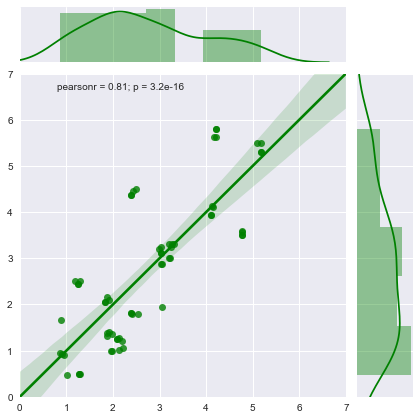

In [59]:
sns.set(style="darkgrid")

g = sns.jointplot(valor_predich, valor_real,kind="reg",
                  xlim=(0, 7), ylim=(0, 7), color="g")

(array([  4.,   4.,   4.,   1.,   1.,  13.,  13.,   7.,   8.,  10.]),
 array([-2.02166057, -1.69299119, -1.36432181, -1.03565243, -0.70698305,
        -0.37831368, -0.0496443 ,  0.27902508,  0.60769446,  0.93636384,
         1.26503322]),
 <a list of 10 Patch objects>)

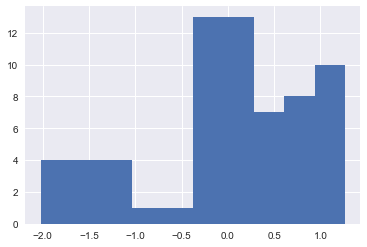

In [61]:
plt.hist([valor_predich-valor_real]) #tienes que ser distr Normal

In [44]:
#nuevo dato
x_new=np.array([10,11,12]).reshape((-1,1))
y_new=model2.predict(x_new)
print(y_new)

[ 3.83853851  4.14984073  4.46114295]
